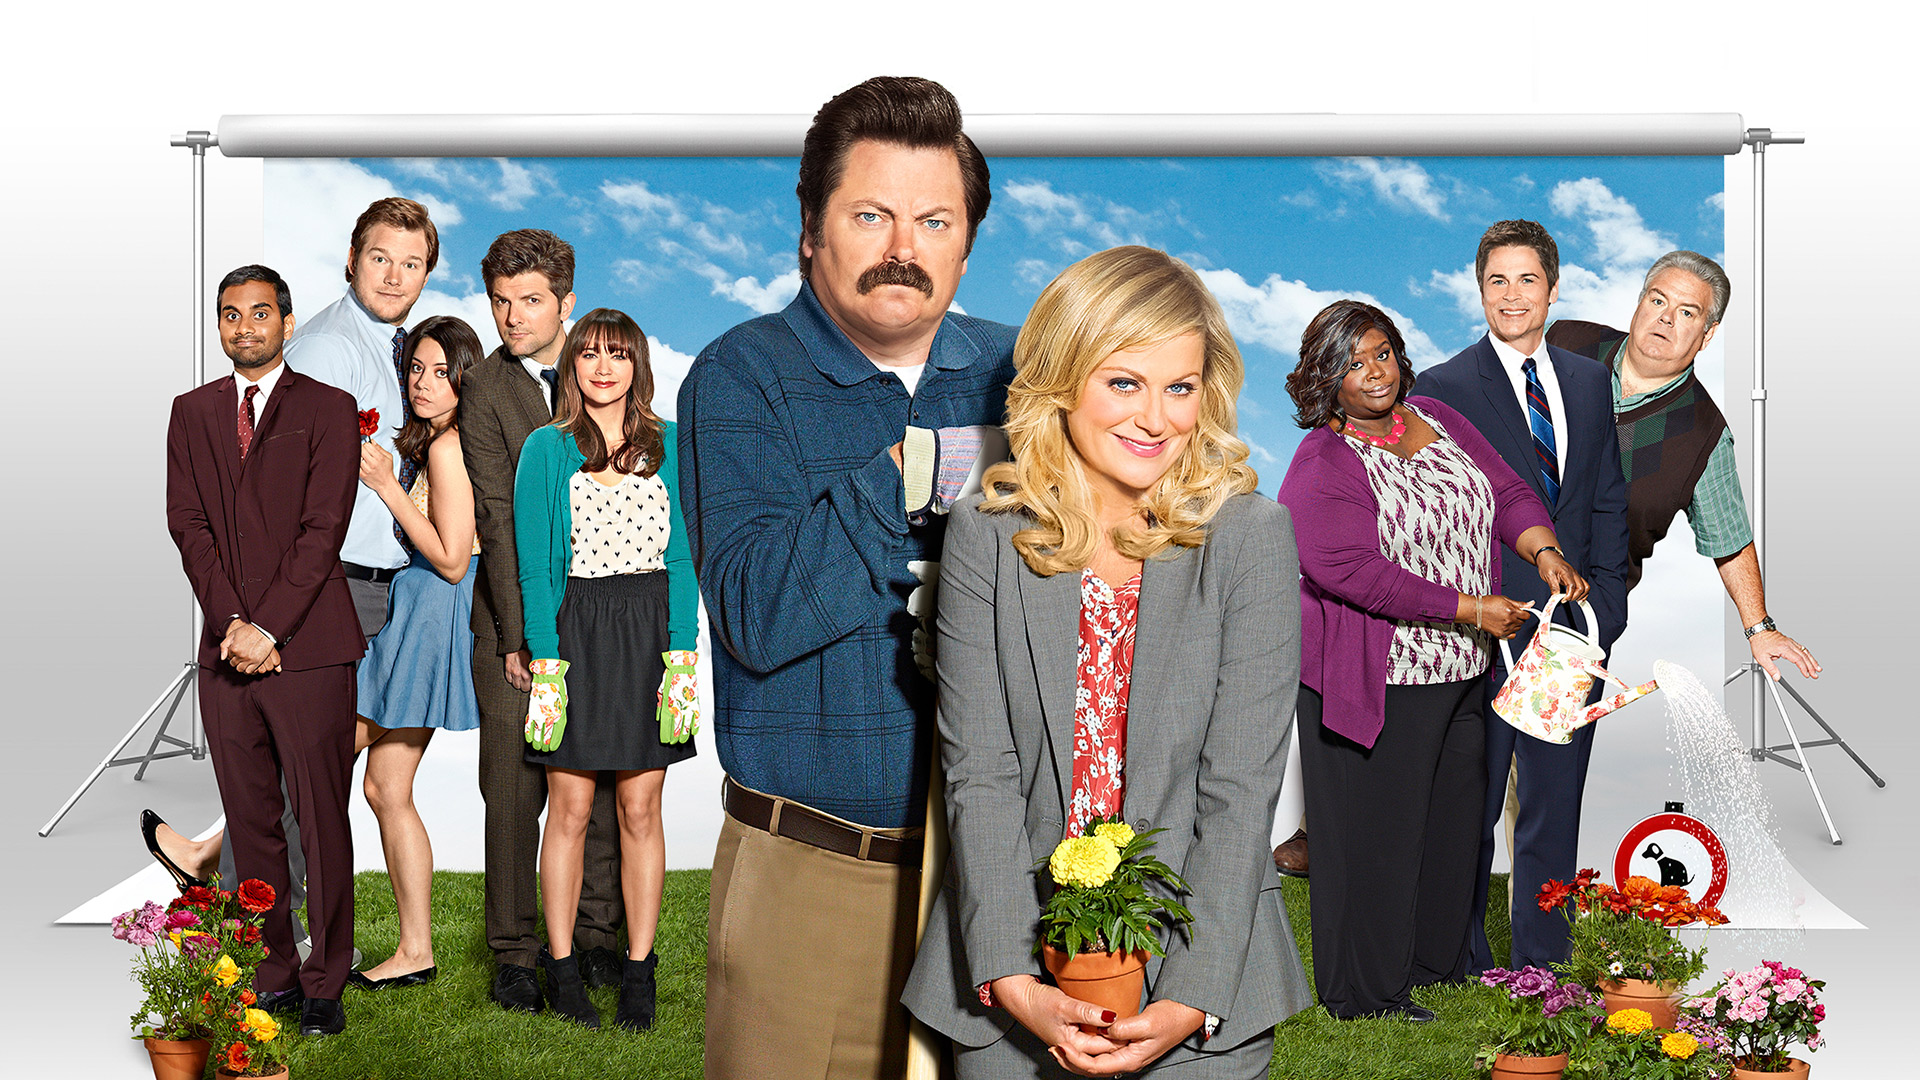

# Fan Favorite Parks and Recreation Throughout the Years

By Katie Denzin

CMSE 201 Section 002 (Dr. Silvia)

April 23, 2023

# Background and Motivation

Parks and Recreation was an American sitcom that ran from 2009-2015 over the course of 7 seasons. It shortly became a cult classic, with its witty humor and values of civics and friendships. Among the fans that have watched and enjoyed this show over the past 15 years, what are the fan favorite episodes, seasons, writers, and characters. This can reveal when the show was in its prime and which parts are most worth watching for future viewers or anyone studying film/tv.

My research question is: What episode, season, writers, and characters of Parks and Recreation was the most popular, measured by viewers and raters.

Reference: https://www.imdb.com/title/tt1266020/

# Methodology

Data for this project was found on Kaggle.com. The two datasets include viewership, ratings, descriptions, and information about different episodes over the shows 7 seasons. Using this information, I can use data analysis through python to deduce fan favorites. I will be using the pandas, numpy, and matplotlib packages for this analysis.

In [1]:
import pandas as pd

# load in the two datasets I will be working with

ep = pd.read_csv("parks_and_rec_episodes.csv", delimiter = ",", skiprows=0)
imdb = pd.read_csv("parks_and_rec_imdb.csv", delimiter = ",", skiprows=0)

#data from https://www.kaggle.com/datasets/bcruise/parks-and-recreation-episode-data



In order to find the favorites of Parks and Recreation, I want to be able to work with a single dataset. Therefore I will clean up the names and combine the two into one dataset.

In [2]:
# rename the columns to match each other

ep.rename({"episode_num_in_season": "episode",
           "original_air_date" : "air_date",
           "us_viewers" : "viewers"}, axis = "columns", inplace = True)


In [3]:
#rename the imdb columns to match the ep dataset

imdb.rename({"episode_num" : "episode",
            "original_air_date" : "air_date"}, axis = "columns", inplace = True)


In [4]:
# add columns from ep dataframe to the imdb

parks = ep #make a copy

# from the imdb dataset, we need the rating, the total votes, and the description

parks["imdb"] = imdb["imdb_rating"]
parks["total_votes"] = imdb["total_votes"]
parks["description"] = imdb["desc"]

In [5]:
parks = parks.dropna()
#for the purposes of this analysis, we will get rid of the final second part of the last season because it has the same 
#information as the first part

parks.head()

,season,episode,episode_num_overall,title,directed_by,written_by,air_date,viewers,imdb,total_votes,description
0,1,1,1,Pilot,Greg Daniels,Greg Daniels & Michael Schur,2009-04-09,6770000.0,7.0,3273.0,"In an attempt to beautify her town, Leslie Kno..."
1,1,2,2,Canvassing,Seth Gordon,Rachel Axler,2009-04-16,5920000.0,7.1,2812.0,Leslie gets a town hall meeting to discuss her...
2,1,3,3,The Reporter,Jeffrey Blitz,Dan Goor,2009-04-23,5240000.0,7.1,2629.0,Leslie gets a newspaper reporter to do a story...
3,1,4,4,Boys' Club,Michael McCullers,Alan Yang,2009-04-30,5290000.0,7.3,2552.0,Leslie tries to infiltrate the boys' club of p...
4,1,5,5,The Banquet,Beth McCarthy-Miller,Tucker Cawley,2009-05-07,4640000.0,7.2,2450.0,"At a banquet honouring her mother, Leslie trie..."


The dataset has 123 rows, each representing an episode within the 7 seasons of the show. Other variables in the dataset include the amount of viewers, the director, writer, air date, imdb rating, the amount of people who voted on the imdb rating, and a description of the episode.

In order to find the fan favorites, I will filter and group the data set by the different variables I am interested in studying. Then, I will use different graphs to find out the favorites based on views, ratings, and mentions.

First, in order to get a general idea of the show, I will graph the amount of viewers over time. 

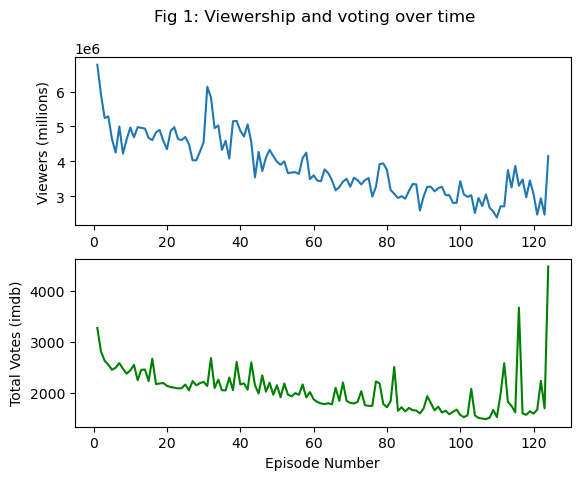

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def fig1(parks):
    plt.suptitle('Fig 1: Viewership and voting over time')
    plt.subplot(2,1,1)
    plt.plot(parks["episode_num_overall"], parks["viewers"])
    plt.ylabel("Viewers (millions)")

    plt.subplot(2,1,2)
    plt.plot(parks["episode_num_overall"], parks["total_votes"], color = "green")
    plt.xlabel("Episode Number")
    plt.ylabel("Total Votes (imdb)")

fig1(parks)

From this graph, the most viewed episode was the pilot. There was a spike around the 30-45 episodes and again towards the end of the series. Viewership did drop steadily througout the course of the series. In addition, the number of votes contributing to the imdb rating steadily decreased throughout the show and spiked in the last season. This is something to consider when choosing a fan favorite episode because some of the episodes and seasons had more viewers or votes.

I also want to see how the ratings changed over time.

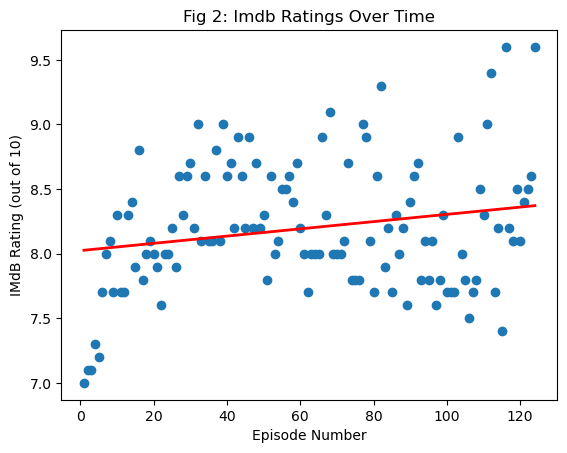

In [7]:
def fig2(parks):
    a, b = np.polyfit(parks["episode_num_overall"], parks["imdb"], 1)

    plt.scatter(parks["episode_num_overall"], parks["imdb"])
    plt.plot(parks["episode_num_overall"], a*parks["episode_num_overall"] + b, color = "r", linewidth = 2)
    plt.xlabel("Episode Number")
    plt.ylabel("IMdB Rating (out of 10)")
    plt.title("Fig 2: Imdb Ratings Over Time")
    
fig2(parks)

First and foremost, I want to find the most popular season of Parks and Rec by finding the episode with the highest rating.

In [8]:
mask = parks["imdb"] == max(parks["imdb"])
print(parks[mask])

     season  episode  episode_num_overall           title  \
115       7        4                  116  Leslie and Ron   
123       7       12                  124   One Last Ride   

              directed_by                   written_by    air_date    viewers  \
115  Beth McCarthy-Miller                Michael Schur  2015-01-20  3300000.0   
123         Michael Schur  Michael Schur & Amy Poehler  2015-02-24  4150000.0   

     imdb  total_votes                                        description  
115   9.6       3674.0  The gang locks Leslie and Ron in the old Parks...  
123   9.6       4485.0  As the team gathers one final time before they...  


The favorite episode of Parks and Rec both occur in the final season of the show, including the final episode. From a content point of view, the episode titled "Leslie and Ron" prominently feature the feature and reconciliation of the two main characters of the show, so I am not surprised. It also makes logical sense that the final episode of the show is the most loved because it is the finale of a beloved series.

Next, I would like to find the most highly rated season.

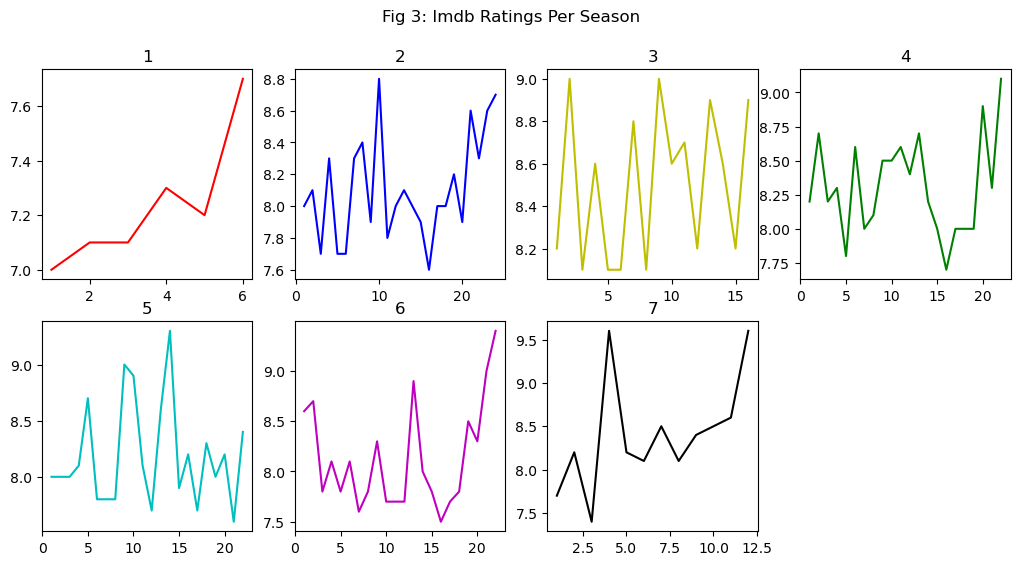

In [9]:
colors = ['r', 'b', 'y', 'g', 'c', 'm', 'k']
seasons = ["one", "two", "three", "four", "five", "six", "seven"]
season_means = {}

plt.figure(figsize=(12.5,6))
plt.suptitle('Fig 3: Imdb Ratings Per Season')

count = 1
for title, group in parks.groupby("season"):
    
    #plot each season's ratings in subplots
    plt.subplot(2,4,count)
    plt.plot(group["episode"], group["imdb"], label = title, color = colors[count-1])
    plt.title(title)
    
    #calculate means of the seasons
    mean = np.mean(group["imdb"])
    season_means[seasons[count-1]] = mean
    
    count+=1

For most of the seasons, there is a slight upward trend in ratings, however, this does not show us very clearly what the favorite season is.

In order to find the favorite season, I will take the mean of the rating per season using the groupby function. Whichever has the highest mean in theory was the most well liked season of Parks and Recreation.

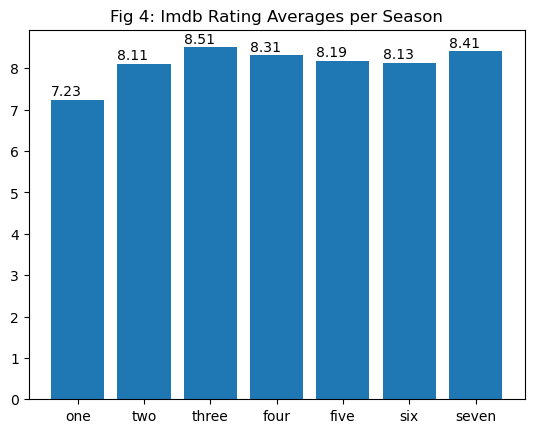

In [10]:
#FAVORITE SEASON

bars = plt.bar(season_means.keys(), season_means.values())
plt.title("Fig 4: Imdb Rating Averages per Season")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.1, round(yval, 2))
    
plt.show()

In a very similar fashion, we will find the highest rated writer using the ratings and the mean. For the purposes of this analysis, any episode that was cowritten was delted from the analysis for simplicity.

In [11]:
#finding the favorite writers
writers_mean = {}

count = 1
for title, group in parks.groupby("written_by"):
    
    #only want episodes written by one person
    if title.__contains__("&") == False:
        
        #calculate means of the seasons
        mean = np.mean(group["imdb"])
        writers_mean[title] = mean
    
    count+=1
    
print(writers_mean)
#https://www.askpython.com/python/string/python-string-contains

{'Aisha Muharrar': 8.0625, 'Alan Yang': 8.033333333333333, 'Alexandra Rushfield': 7.85, 'Amy Poehler': 8.700000000000001, 'Chelsea Peretti': 8.1, 'Dan Goor': 8.277777777777777, 'Dave King': 8.3, 'Donick Cary': 8.149999999999999, 'Emily Kapnek': 8.6, 'Emily Spivey': 8.2, 'Greg Levine': 7.8, 'Harris Wittels': 8.145454545454545, 'Jen Statsky': 8.2, 'Joe Mande': 8.0, 'Katie Dippold': 8.185714285714285, 'Matt Hubbard': 8.15, 'Matt Murray': 7.9, 'Megan Amram': 7.900000000000001, 'Michael Schur': 8.525, 'Mike Scully': 8.333333333333334, 'Nate DiMeo': 7.7, 'Nick Offerman': 8.0, 'Norm Hiscock': 8.225000000000001, 'Rachel Axler': 7.7, 'Sam Means': 7.7, 'Tucker Cawley': 7.2}


Again, I will find the mean Imdb rating featuring all 9 of the main characters within the show. It is important to note that the characters Ben and Chris do not show up until the very end of season two. The character Jerry was also not included because as a running joke in the sitcom, his name changes many times making it logistically difficult to add him to this part of the analysis.

In [12]:
#loop through rows
chars = {"Leslie": [] , "Ron":[] , "Ann":[], "Chris":[], "Ben":[], "Andy":[], "Tom":[], "April":[], "Donna":[]}

parks_desc = parks["description"]

for i in range(len(parks_desc)): #for each row/episode description
    desc = parks_desc[i]
    
    for name in chars.keys(): #check for each character name in the 
        if desc.__contains__(name):
            chars[name].append(parks.iloc[i,8]) #append the rating for that episode to the list
            
            
#take the means of the episode ratings
for name in chars.keys():
    avg = np.mean(chars[name])
    chars[name] = avg

print(chars)
#https://www.askpython.com/python/string/python-string-contains

{'Leslie': 8.173949579831934, 'Ron': 8.239062500000001, 'Ann': 8.149999999999999, 'Chris': 8.252631578947367, 'Ben': 8.285185185185187, 'Andy': 8.250980392156864, 'Tom': 8.18909090909091, 'April': 8.251428571428571, 'Donna': 8.322222222222223}


# Results



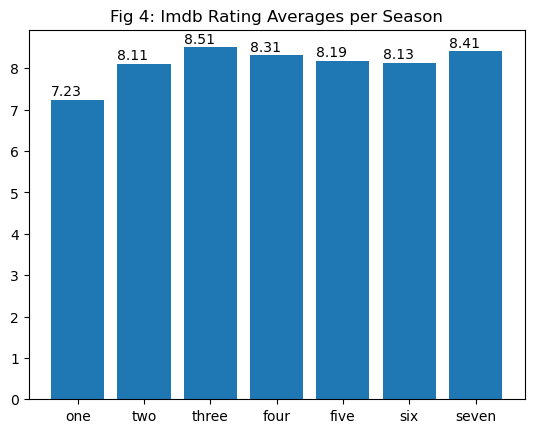

In [13]:
#FAVORITE SEASON

bars = plt.bar(season_means.keys(), season_means.values())
plt.title("Fig 4: Imdb Rating Averages per Season")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.1, round(yval, 2))
    
plt.show()

#https://stackoverflow.com/questions/53066633/how-to-show-values-on-top-of-bar-plot

Although all seasons of Parks and Recreation were highly rated, the third season was the highest rated on average by Imbd voters. With this in mind, I was curious if the viewership of this season was also higher in which case I will revisit figure one of this analysis. Season 3 is overall episodes 31-46

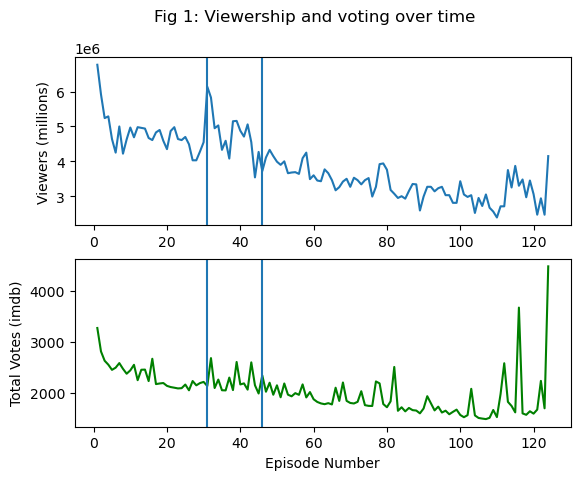

In [14]:
plt.suptitle('Fig 1: Viewership and voting over time')
plt.subplot(2,1,1)
plt.plot(parks["episode_num_overall"], parks["viewers"])
plt.ylabel("Viewers (millions)")
plt.axvline(31)
plt.axvline(46)

plt.subplot(2,1,2)
plt.plot(parks["episode_num_overall"], parks["total_votes"], color = "green")
plt.xlabel("Episode Number")
plt.ylabel("Total Votes (imdb)")
plt.axvline(31)
plt.axvline(46)

Interestingly, the most popular season of Parks and Rec starts with a spike in viewership but gradually falls throughout the season. However, it does stay consistently higher than the rest of the duration of the show. My hypothesis as to why season three is the most popular is that the main love interest, Ben Wyatt, is introduced and heavily featured in the season.

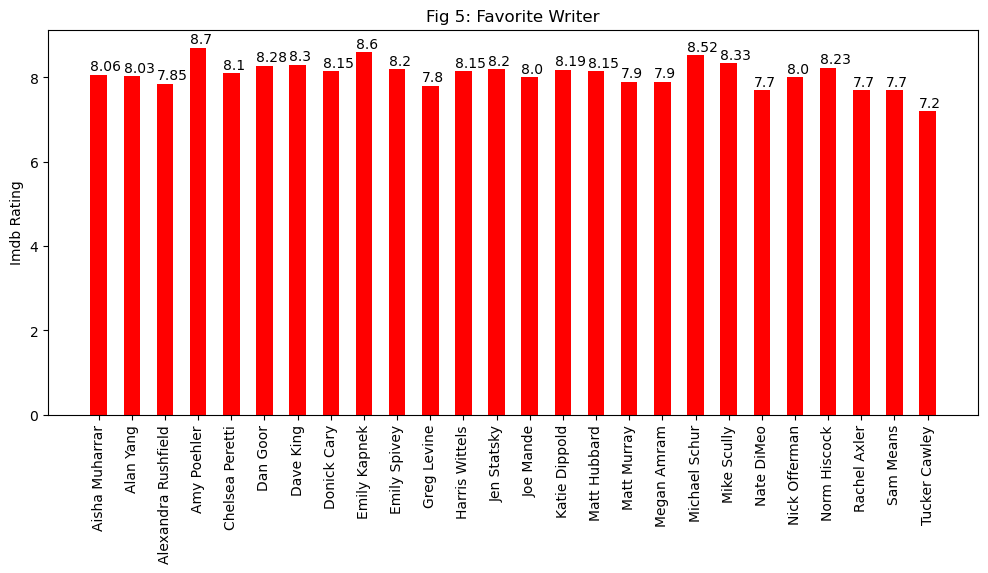

In [15]:
#BEST WRITER

plt.figure(figsize=(12, 5))
plt.title("Fig 5: Favorite Writer")
plt.ylabel("Imdb Rating")
bars = plt.bar(writers_mean.keys(), writers_mean.values(), width = 0.5, color = "r")
plt.xticks(rotation='vertical')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.1, round(yval, 2))
    
plt.show()


Amy Poehler is the writer with the highest average rating. As the start of the show, it is unsurprising that her episodes are rated higher than many of the other writers. It is also worth noting that the creater of the show, Micheal Schur, is also highly rated. The favorite episode of the show, further more, was written by both Amy and Micheal.

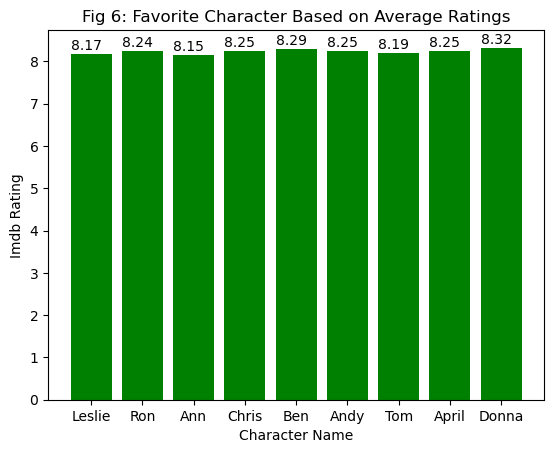

In [16]:
#FAVORITE CHARACTER

bars = plt.bar(chars.keys(), chars.values(), color = 'g')
plt.title("Fig 6: Favorite Character Based on Average Ratings")
plt.ylabel("Imdb Rating")
plt.xlabel("Character Name")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 0.1, round(yval, 2))
    
plt.show()

Finally, the ratings featuring all of the characters are quite similar. This could speak to the fact that they are all featured throughout the season and are there for represented pretty consistently. It is worth noting that the character Donna has the highest ratings. This is interested, because although she is a central character, she is not as central to the plot of the show as compared to the others analyzed. Her high rating implies that when she is heavily featured in the show, it is going to be good.

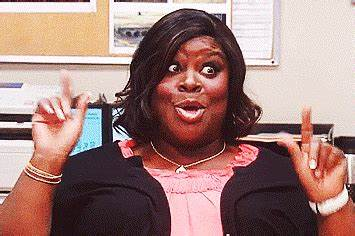

# Synthesis and Discussion

Overall, Parks and Recreation is a popular and well rated show. Even the first season received Imdb ratings over 7 consistently and boasted high viewership. However, based on the ratings and viewership, some fan favorites emerged. Season three was the highest rated season and among the most watched season. Two episodes in the last season of the show were highest rated, as well as being written by two of the favored writers, actor Amy Poehler and creator Micheal Schur. All of the character were quite well liked, without any very significant results. However, the character Donna did slightly come ahead, meaning the episodes that she is most featured in are certainly worth a shot. 

Some obstables I ran into in this project had to do with the writers section. Many of these shows were cowritten or written only by one person on one occasion. It was difficult to find a way to filter these results or decide if co-writers should be split up or not. Additionally, the episode descriptions had a lot of potential for further content analysis and I am looking forward to gaining more coding skills in order to acheive such ideas. Finally, the Imdb rating is a valuable source of information, but I would have liked to have a secondary rating system to compare and contrast to that would have brought a level of depth to this project.

Parks and Recreation will remain a staple in American sitcoms as it continues to be streamed and enjoyed today. My overall takeaway from this project is that Parks and Rec is a high quality show that a lot of writers, directors, and actors contributed to. I learned a lot about the groupby function and using efficient loops to complete this analysis.